<a href="https://colab.research.google.com/github/iamindhu/fmml_labs/blob/main/Lab1_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=66c501cc9cdc4dbbab72d72e6be1500f5d23dda9e5b982c9d3afba5618c8584d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
eng1

'The giraffe (Giraffa) is an African artiodactyl mammal, the tallest living terrestrial animal and the largest ruminant.  It is traditionally considered to be one species, Giraffa camelopardalis, with nine subspecies. However, the existence of up to nine extant giraffe species has been described, based upon research into the mitochondrial and nuclear DNA, as well as morphological measurements of Giraffa. Seven other prehistoric species, known from fossils, are extinct.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its distinctive coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits and flowers of woody plants, primarily acacia species, which

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.


In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)

thegiraffegiraffaisanafricanartiodactylmammalthetallestlivingterrestrialanimalandthelargestruminantitistraditionallyconsideredtobeonespeciesgiraffacamelopardaliswithninesubspecieshowevertheexistenceofuptonineextantgiraffespecieshasbeendescribedbaseduponresearchintothemitochondrialandnucleardnaaswellasmorphologicalmeasurementsofgiraffasevenotherprehistoricspeciesknownfromfossilsareextinctthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsdistinctivecoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheiroffspringorbachelorherdsof

In [7]:
list(ngrams(eng1, 1))

[('t',),
 ('h',),
 ('e',),
 ('g',),
 ('i',),
 ('r',),
 ('a',),
 ('f',),
 ('f',),
 ('e',),
 ('g',),
 ('i',),
 ('r',),
 ('a',),
 ('f',),
 ('f',),
 ('a',),
 ('i',),
 ('s',),
 ('a',),
 ('n',),
 ('a',),
 ('f',),
 ('r',),
 ('i',),
 ('c',),
 ('a',),
 ('n',),
 ('a',),
 ('r',),
 ('t',),
 ('i',),
 ('o',),
 ('d',),
 ('a',),
 ('c',),
 ('t',),
 ('y',),
 ('l',),
 ('m',),
 ('a',),
 ('m',),
 ('m',),
 ('a',),
 ('l',),
 ('t',),
 ('h',),
 ('e',),
 ('t',),
 ('a',),
 ('l',),
 ('l',),
 ('e',),
 ('s',),
 ('t',),
 ('l',),
 ('i',),
 ('v',),
 ('i',),
 ('n',),
 ('g',),
 ('t',),
 ('e',),
 ('r',),
 ('r',),
 ('e',),
 ('s',),
 ('t',),
 ('r',),
 ('i',),
 ('a',),
 ('l',),
 ('a',),
 ('n',),
 ('i',),
 ('m',),
 ('a',),
 ('l',),
 ('a',),
 ('n',),
 ('d',),
 ('t',),
 ('h',),
 ('e',),
 ('l',),
 ('a',),
 ('r',),
 ('g',),
 ('e',),
 ('s',),
 ('t',),
 ('r',),
 ('u',),
 ('m',),
 ('i',),
 ('n',),
 ('a',),
 ('n',),
 ('t',),
 ('i',),
 ('t',),
 ('i',),
 ('s',),
 ('t',),
 ('r',),
 ('a',),
 ('d',),
 ('i',),
 ('t',),
 ('i',),
 ('o',),
 

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [8]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

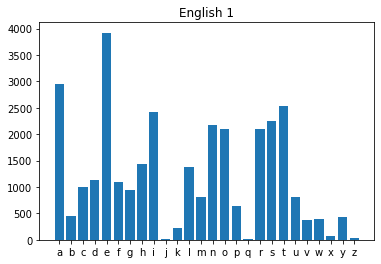

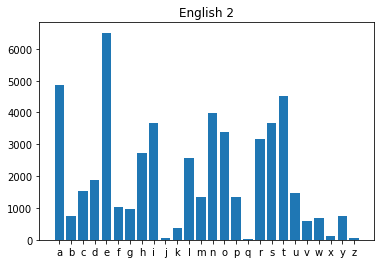

In [9]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

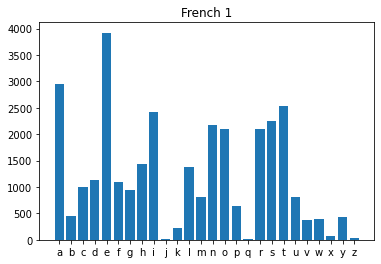

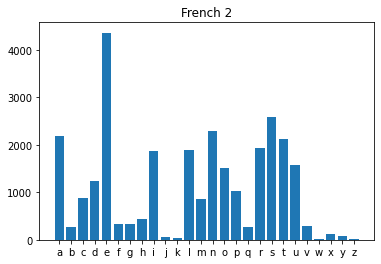

In [10]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

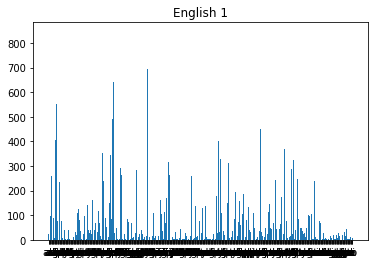

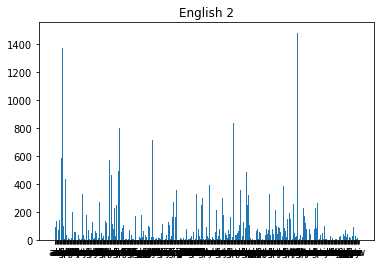

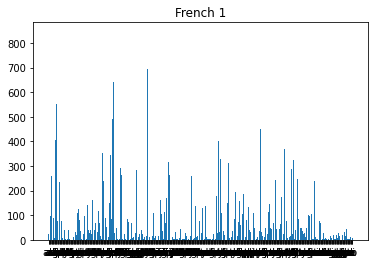

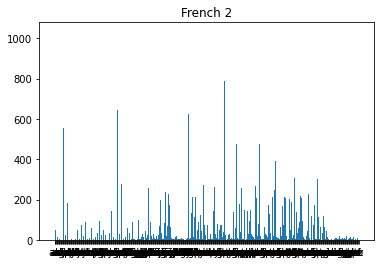

In [11]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [12]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

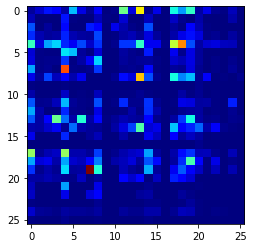

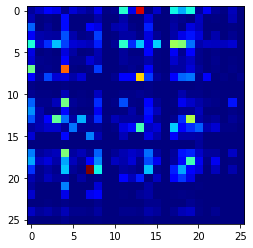

In [13]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

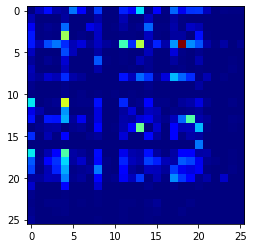

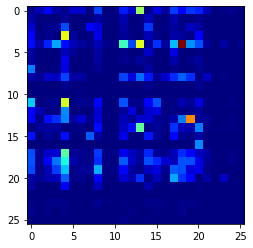

In [14]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [15]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [16]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1367.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 801.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 1028.0
('n', 't') : 786.0
('d', 'e') : 655.0
('e', 'n') : 646.0
('l', 'e') : 623.0
('a', 'n') : 553.0
('o', 'n') : 478.0
('r', 'e') : 477.0
('e', 'l') : 437.0
('s', 'e') : 390.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

## Different Languages 

In [17]:
topic = 'Pizza'
wikipedia.set_lang('en') # English
eng = wikipedia.page(topic).content
wikipedia.set_lang('fr') # French
fr = wikipedia.page(topic).content
wikipedia.set_lang('sv') # Swedish
sv = wikipedia.page(topic).content
wikipedia.set_lang('de') # German
de = wikipedia.page(topic).content

In [18]:
eng = cleanup(eng)
fr = cleanup(fr)
sv = cleanup(sv)
de = cleanup(de)

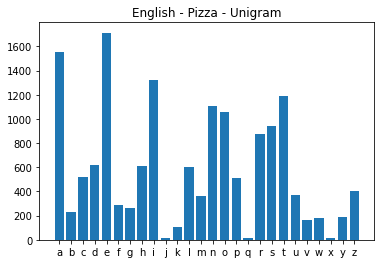

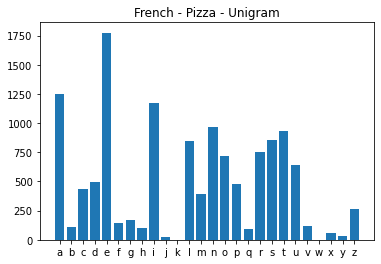

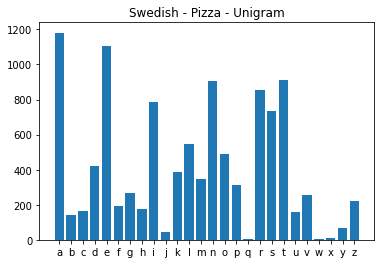

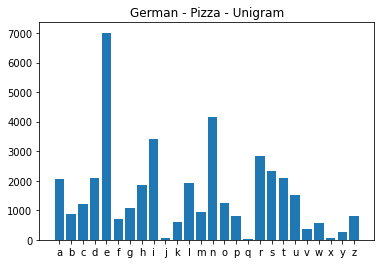

In [19]:
unigram_eng = Counter(ngrams(eng,1))
plothistogram(unigram_eng)
plt.title('English - Pizza - Unigram')
plt.show()
unigram_fr = Counter(ngrams(fr,1))
plothistogram(unigram_fr)
plt.title('French - Pizza - Unigram')
plt.show()
unigram_sv = Counter(ngrams(sv,1))
plothistogram(unigram_sv)
plt.title('Swedish - Pizza - Unigram')
plt.show()
unigram_de = Counter(ngrams(de,1))
plothistogram(unigram_de)
plt.title('German - Pizza - Unigram')
plt.show()

Even though the distributions vary a bit, the most occuring characters are almost the same across 4 languages. Using this as a prime feature for differentiating between languages will be difficult. Hence unigrams may not be the most appropriate feature for distinguishing between languages.

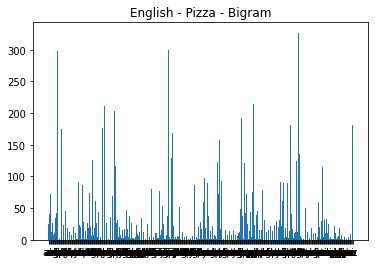

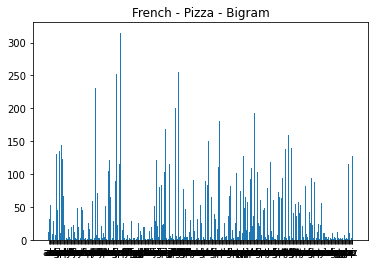

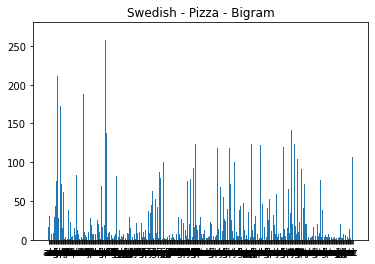

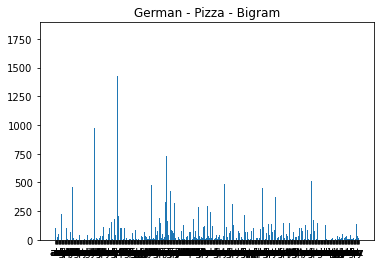

In [20]:
bigram_eng = Counter(ngrams(eng,2))
plothistogram(bigram_eng)
plt.title('English - Pizza - Bigram')
plt.show()
bigram_fr = Counter(ngrams(fr,2))
plothistogram(bigram_fr)
plt.title('French - Pizza - Bigram')
plt.show()
bigram_sv = Counter(ngrams(sv,2))
plothistogram(bigram_sv)
plt.title('Swedish - Pizza - Bigram')
plt.show()
bigram_de = Counter(ngrams(de,2))
plothistogram(bigram_de)
plt.title('German - Pizza - Bigram')
plt.show()

Bigrams look like a better feature to distinguish between languages when compared to unigrams. But visualisation using histograms for bigrams is not the best way as we have 26X26 bigrams. Using a heat map could be better

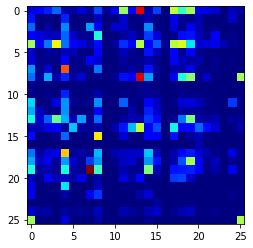

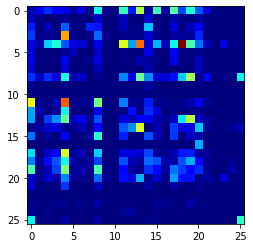

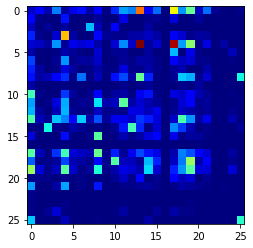

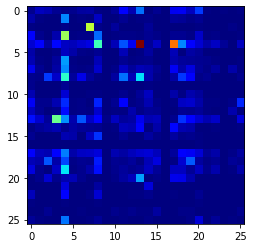

In [21]:
bieng = plotbihistogram(bigram_eng)
plt.show()
bifr = plotbihistogram(bigram_fr)
plt.show()
bisv = plotbihistogram(bigram_sv)
plt.show()
bide = plotbihistogram(bigram_de)
plt.show()

This is a more comfortable way of visualisation. We can instantly differentiate German from the rest. Other laguages also seem to have differences in the patterns formed in the heat map.  We can have a look at the top 10 bigrams of each language to make things clear.

In [22]:
print('\nEnglish Top 10 Bigrams - Pizza:')
ShowTopN(bieng)
print('\French Top 10 Bigrams - Pizza:')
ShowTopN(bifr)
print('\nSwedish Top 10 Bigrams - Pizza:')
ShowTopN(bisv)
print('\nGerman Top 10 Bigrams - Pizza:')
ShowTopN(bide)


English Top 10 Bigrams - Pizza:
('t', 'h') : 327.0
('i', 'n') : 300.0
('a', 'n') : 298.0
('h', 'e') : 268.0
('r', 'e') : 228.0
('p', 'i') : 215.0
('e', 'd') : 212.0
('e', 's') : 203.0
('o', 'n') : 193.0
('a', 'r') : 192.0
\French Top 10 Bigrams - Pizza:
('e', 's') : 315.0
('l', 'e') : 255.0
('e', 'n') : 252.0
('d', 'e') : 231.0
('l', 'a') : 201.0
('e', 'l') : 194.0
('o', 'n') : 194.0
('r', 'e') : 193.0
('n', 't') : 180.0
('a', 'n') : 176.0

Swedish Top 10 Bigrams - Pizza:
('e', 'n') : 267.0
('e', 'r') : 257.0
('a', 'n') : 211.0
('d', 'e') : 188.0
('a', 'r') : 173.0
('s', 't') : 143.0
('t', 'a') : 142.0
('e', 't') : 138.0
('r', 'i') : 128.0
('i', 'n') : 127.0

German Top 10 Bigrams - Pizza:
('e', 'n') : 1804.0
('e', 'r') : 1423.0
('c', 'h') : 1051.0
('d', 'e') : 978.0
('n', 'd') : 864.0
('e', 'i') : 764.0
('i', 'e') : 728.0
('t', 'e') : 628.0
('i', 'n') : 622.0
('u', 'n') : 513.0


The top 10 bigrams are clearly differnet across languages

## Different topics


In [23]:
topic1 = 'Karnataka'
topic2 = 'Cricket'
topic3 = 'Pizza'
wikipedia.set_lang('en')
kar = wikipedia.page(topic1).content
cricket = wikipedia.page(topic2).content
pizza = wikipedia.page(topic3).content
kar = cleanup(kar)
cricket = cleanup(cricket)
pizza = cleanup(pizza)

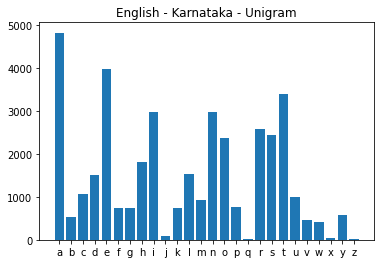

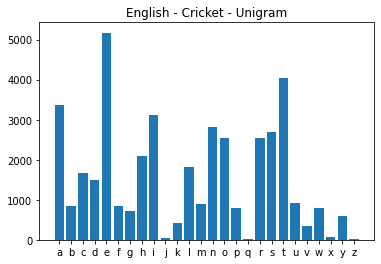

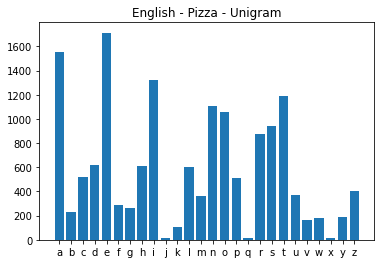

In [24]:
unigram_kar = Counter(ngrams(kar,1))
plothistogram(unigram_kar)
plt.title('English - Karnataka - Unigram')
plt.show()
unigram_cricket = Counter(ngrams(cricket,1))
plothistogram(unigram_cricket)
plt.title('English - Cricket - Unigram')
plt.show()
unigram_pizza = Counter(ngrams(pizza,1))
plothistogram(unigram_pizza)
plt.title('English - Pizza - Unigram')
plt.show()

Looks like the frequencies of unigrams across different articles is almost the same.

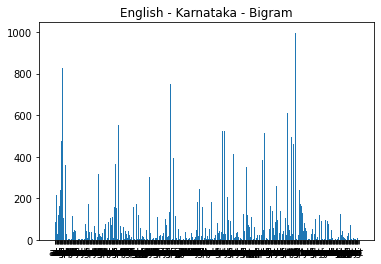

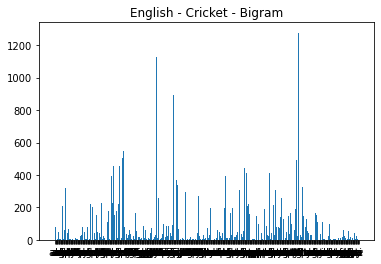

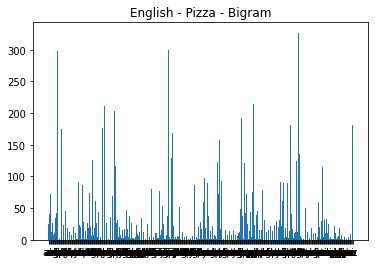

In [25]:
bigram_kar = Counter(ngrams(kar,2))
plothistogram(bigram_kar)
plt.title('English - Karnataka - Bigram')
plt.show()
bigram_cricket = Counter(ngrams(cricket,2))
plothistogram(bigram_cricket)
plt.title('English - Cricket - Bigram')
plt.show()
bigram_pizza = Counter(ngrams(pizza,2))
plothistogram(bigram_pizza)
plt.title('English - Pizza - Bigram')
plt.show()

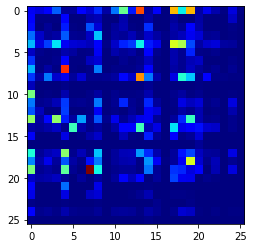

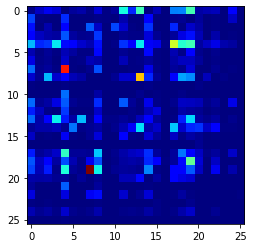

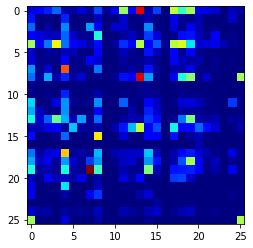

In [26]:
bikar = plotbihistogram(bigram_kar)
plt.show()
bicri = plotbihistogram(bigram_cricket)
plt.show()
bipi = plotbihistogram(bigram_pizza)
plt.show()

There are very subte differencies in the frequecies of bigrams as well

In [27]:
print('\nEnglish Top 10 Bigrams - Karnataka:')
ShowTopN(bikar)
print('\Englsh Top 10 Bigrams - Cricket:')
ShowTopN(bicri)
print('\English Top 10 Bigrams - Pizza:')
ShowTopN(bipi)


English Top 10 Bigrams - Karnataka:
('t', 'h') : 997.0
('h', 'e') : 857.0
('a', 'n') : 829.0
('i', 'n') : 752.0
('a', 't') : 711.0
('a', 'r') : 709.0
('e', 'r') : 609.0
('s', 't') : 609.0
('e', 's') : 555.0
('n', 'a') : 525.0
\Englsh Top 10 Bigrams - Cricket:
('t', 'h') : 1277.0
('h', 'e') : 1128.0
('i', 'n') : 893.0
('e', 'r') : 764.0
('s', 't') : 600.0
('a', 't') : 550.0
('a', 'n') : 548.0
('e', 't') : 547.0
('r', 'e') : 524.0
('e', 's') : 506.0
\English Top 10 Bigrams - Pizza:
('t', 'h') : 327.0
('i', 'n') : 300.0
('a', 'n') : 298.0
('h', 'e') : 268.0
('r', 'e') : 228.0
('p', 'i') : 215.0
('e', 'd') : 212.0
('e', 's') : 203.0
('o', 'n') : 193.0
('a', 'r') : 192.0


The most occuring bigrams are the same for different topics from the same language

## trigrams

In [28]:
trigram_pizza = Counter(ngrams(pizza,3))

In [36]:
trigram_pizza.most_common()[0:10]

[(('t', 'h', 'e'), 199),
 (('i', 'z', 'z'), 170),
 (('p', 'i', 'z'), 168),
 (('z', 'z', 'a'), 167),
 (('a', 'n', 'd'), 122),
 (('i', 'n', 'g'), 77),
 (('i', 'o', 'n'), 76),
 (('e', 'n', 't'), 62),
 (('i', 't', 'h'), 53),
 (('a', 'r', 'e'), 51)]

We can see that the most common trigrams are some commonly occuring english words like "the", "are", "and" and trigrams of the word "pizza" that includes "piz", "izz", "zza". This suggests that, if we confine ourselves to one particular language, like english, then processing words as a whole might be better to compare 2 articles. 

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [37]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [38]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

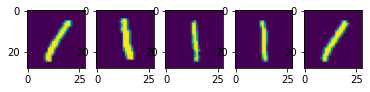

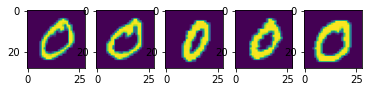

In [39]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [40]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

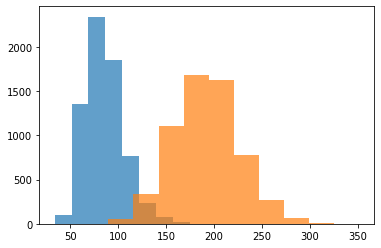

In [41]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [42]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

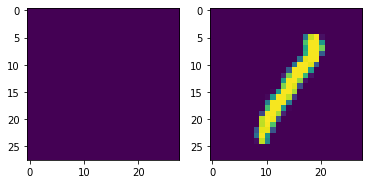

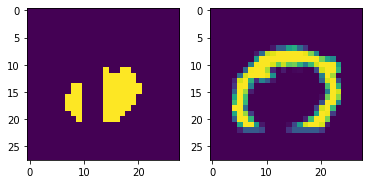

In [43]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

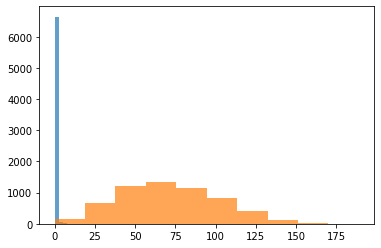

In [44]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [45]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


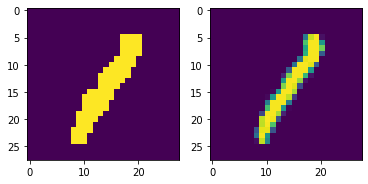

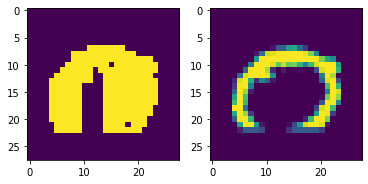

In [46]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

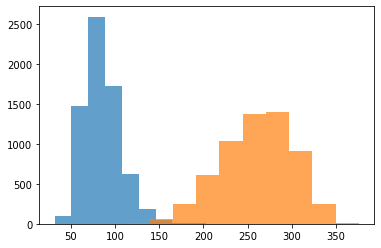

In [47]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [48]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

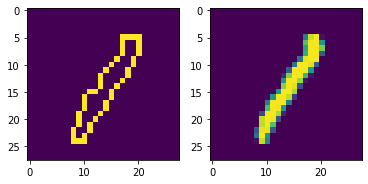

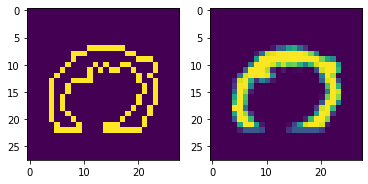

In [49]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

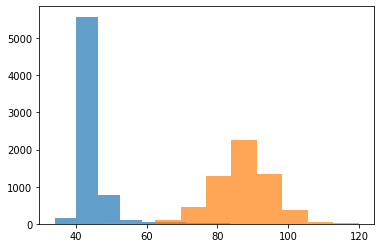

In [50]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

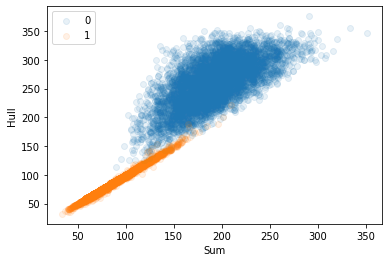

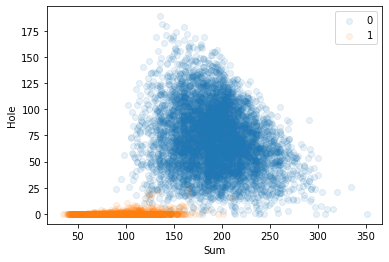

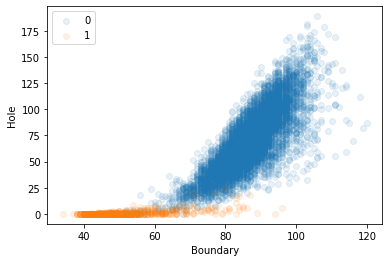

In [51]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [52]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1. From visual inspection, I would say Hole and Sub would be the best feature because it appears to have the least intersection between classes in the above plotted graphs.

## 2. plotting 4 features

We could add a fourth dimension as size while mentioning the arguments for the scatterplot

In [53]:
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)),  np.concatenate((hull1, hull0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary','Hull' , 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Boundary', z='Hull', color='Class', size='Sum',opacity=0.1)
fig.show()

## Other classes, more than one class at a time

In [54]:
no1 = train_X[train_y==1,:,:]
no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]
no4 = train_X[train_y==4,:,:]
no5 = train_X[train_y==5,:,:]
no6 = train_X[train_y==6,:,:]
no7 = train_X[train_y==7,:,:]
no8 = train_X[train_y==8,:,:]
no9 = train_X[train_y==9,:,:]
no0 = train_X[train_y==0,:,:]

In [55]:
sum2 = np.sum(no2>0, (1,2)) # threshold before adding up
sum9 = np.sum(no9>0, (1,2))
sum1 = np.sum(no1>0, (1,2))
sum3 = np.sum(no3>0, (1,2))
sum4 = np.sum(no4>0, (1,2))
sum5 = np.sum(no5>0, (1,2))
sum6 = np.sum(no6>0, (1,2))
sum7 = np.sum(no7>0, (1,2))
sum8 = np.sum(no8>0, (1,2))
sum0 = np.sum(no0>0, (1,2))

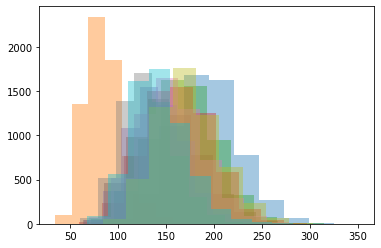

In [56]:
plt.hist(sum0, alpha=0.4);
plt.hist(sum1, alpha=0.4);
plt.hist(sum2, alpha=0.4);
plt.hist(sum3, alpha=0.4);
plt.hist(sum4, alpha=0.4);
plt.hist(sum5, alpha=0.4);
plt.hist(sum6, alpha=0.4);
plt.hist(sum7, alpha=0.4);
plt.hist(sum8, alpha=0.4);
plt.hist(sum9, alpha=0.4);

Sum of 1 seems to stand out from the rest. This means even of we cannot distinguish between other numbers, we can distinguish between 1 and the other numbers

In [57]:
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull4 = np.array([getHullPixels(i).sum() for i in no4])
hull5 = np.array([getHullPixels(i).sum() for i in no5])
hull6 = np.array([getHullPixels(i).sum() for i in no6])
hull7 = np.array([getHullPixels(i).sum() for i in no7])
hull8 = np.array([getHullPixels(i).sum() for i in no8])
hull9 = np.array([getHullPixels(i).sum() for i in no9])

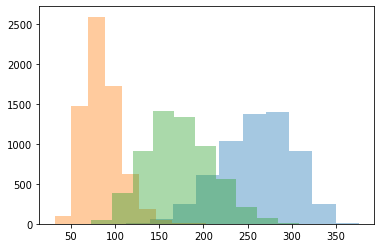

In [58]:
plt.hist(hull0, alpha=0.4);
plt.hist(hull1, alpha=0.4);
# plt.hist(hull2, alpha=0.4);
# plt.hist(hull3, alpha=0.4);
# plt.hist(hull4, alpha=0.4);
# plt.hist(hull5, alpha=0.4);
plt.hist(hull6, alpha=0.4);
# plt.hist(hull7, alpha=0.4);
# plt.hist(hull8, alpha=0.4);
# plt.hist(hull9, alpha=0.4);

0, 1 and (2-9) can be reasonably distinguised between eachother but "Hull" of 2-9 seem to overlap a lot

In [59]:
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])
bound4 = np.array([getBoundaryPixels(i).sum() for i in no4])
bound5 = np.array([getBoundaryPixels(i).sum() for i in no5])
bound6 = np.array([getBoundaryPixels(i).sum() for i in no6])
bound7 = np.array([getBoundaryPixels(i).sum() for i in no7])
bound8 = np.array([getBoundaryPixels(i).sum() for i in no8])
bound9 = np.array([getBoundaryPixels(i).sum() for i in no9])

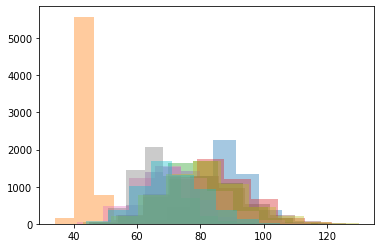

In [60]:
plt.hist(bound0, alpha=0.4);
plt.hist(bound1, alpha=0.4);
plt.hist(bound2, alpha=0.4);
plt.hist(bound3, alpha=0.4);
plt.hist(bound4, alpha=0.4);
plt.hist(bound5, alpha=0.4);
plt.hist(bound6, alpha=0.4);
plt.hist(bound7, alpha=0.4);
plt.hist(bound8, alpha=0.4);
plt.hist(bound9, alpha=0.4);

Using "Boundary", 1 can be reasonably differentiated from the rest of the numbers. But differentiating between 0, 2, 3,4, 5,6, 7,8, 9 is difficult as there is a lot of overlap in the histograms plotted

In [61]:
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole4 = np.array([getHolePixels(i).sum() for i in no4])
hole5 = np.array([getHolePixels(i).sum() for i in no5])
hole6 = np.array([getHolePixels(i).sum() for i in no6])
hole7 = np.array([getHolePixels(i).sum() for i in no7])
hole8 = np.array([getHolePixels(i).sum() for i in no8])
hole9 = np.array([getHolePixels(i).sum() for i in no9])

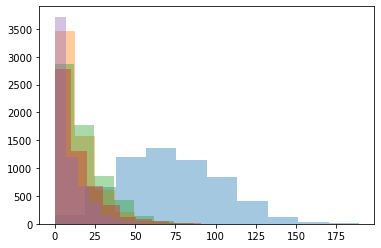

In [62]:
plt.hist(hole0, alpha=0.4);
# plt.hist(hole1, alpha=0.4);
plt.hist(hole2, alpha=0.4);
plt.hist(hole3, alpha=0.4);
# plt.hist(hole4, alpha=0.4);
plt.hist(hole5, alpha=0.4);
# plt.hist(hole6, alpha=0.4);
plt.hist(hole7, alpha=0.4);
# plt.hist(hole8, alpha=0.4);
# plt.hist(hole9, alpha=0.4);

Using "Hole" calculation, 0 can be reasonably diffrentiated from 2, 3, 5 and 7. But 2, 3, 5 and 7 cannot be differentiated between eachother. The reason is because 4, 6, 8, and 9 have holes in them